In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats import binomtest , chisquare
import numpy as np

In [57]:
df = sns.load_dataset('tips')

df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

# Binomtest 

binomtest(k,n,p=0.5,alternative='two=sided)


k:int 
        the number of successes
n:int
        the number of trials
p : float , optional
        the hypothesized probality of succes
alternative :two=sided. greater,less : optional
        indicates the alternative hypothesis

In [58]:
p = 0.5 


In [59]:
df["time"].value_counts(normalize=True)*100

time
Dinner    72.131148
Lunch     27.868852
Name: proportion, dtype: float64

In [60]:
k = df["time"].value_counts()["Dinner"]
k

np.int64(176)

In [61]:
n = len(df)
n

244

In [62]:
alpha = 0.02

p_value=binomtest(k=k,n=n,p=p,alternative='greater').pvalue

if p_value < alpha:
    print("nous avons suffisament d'evidences On rejette H0")
else:
    print("nous n'avons pas suffisament d'evidences On ne rejette pas H0")

nous avons suffisament d'evidences On rejette H0


# test de chie2

chisquare(f_obs,f_exp,ddof=0,axis=0)
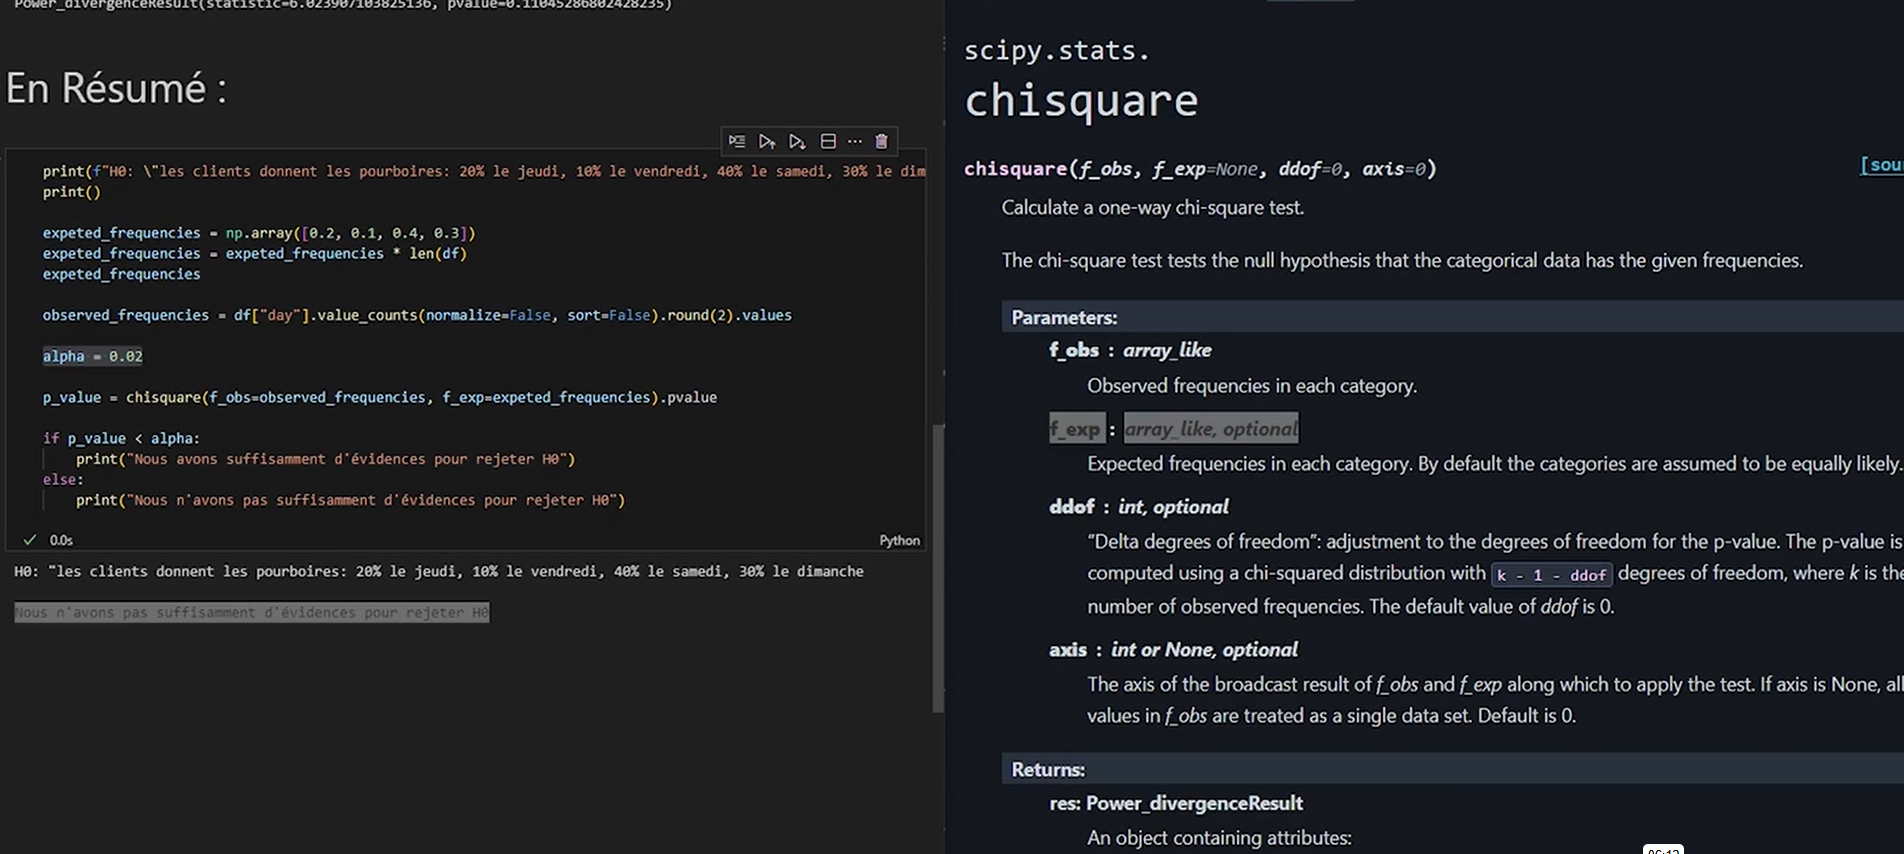



In [63]:
expected_frequencies = np.array([0.2,0.1,0.4,0.3])

In [64]:
df['day'].value_counts(normalize=True,sort=False).round(2)*100

day
Thur    25.0
Fri      8.0
Sat     36.0
Sun     31.0
Name: proportion, dtype: float64

In [65]:
expected_frequencies = expected_frequencies * len(df)
expected_frequencies

array([48.8, 24.4, 97.6, 73.2])

In [66]:
observed_frequencies = df['day'].value_counts(sort=False,normalize=True).round(2).values
observed_frequencies

array([0.25, 0.08, 0.36, 0.31])

In [67]:
# Check the sums of the observed and expected frequencies
print("Sum of observed frequencies:", sum(observed_frequencies))
print("Sum of expected frequencies:", sum(expected_frequencies))


Sum of observed frequencies: 1.0
Sum of expected frequencies: 244.0


In [68]:
observed_frequencies = df['day'].value_counts(sort=False).values

expected_frequencies = np.array([0.2, 0.1, 0.4, 0.3]) * len(df)


alpha = 0.02
p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies).pvalue

if p_value < alpha:
    print("Nous avons suffisamment d'évidences, on rejette H0")
else:
    print("Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0")


Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0


# test de student
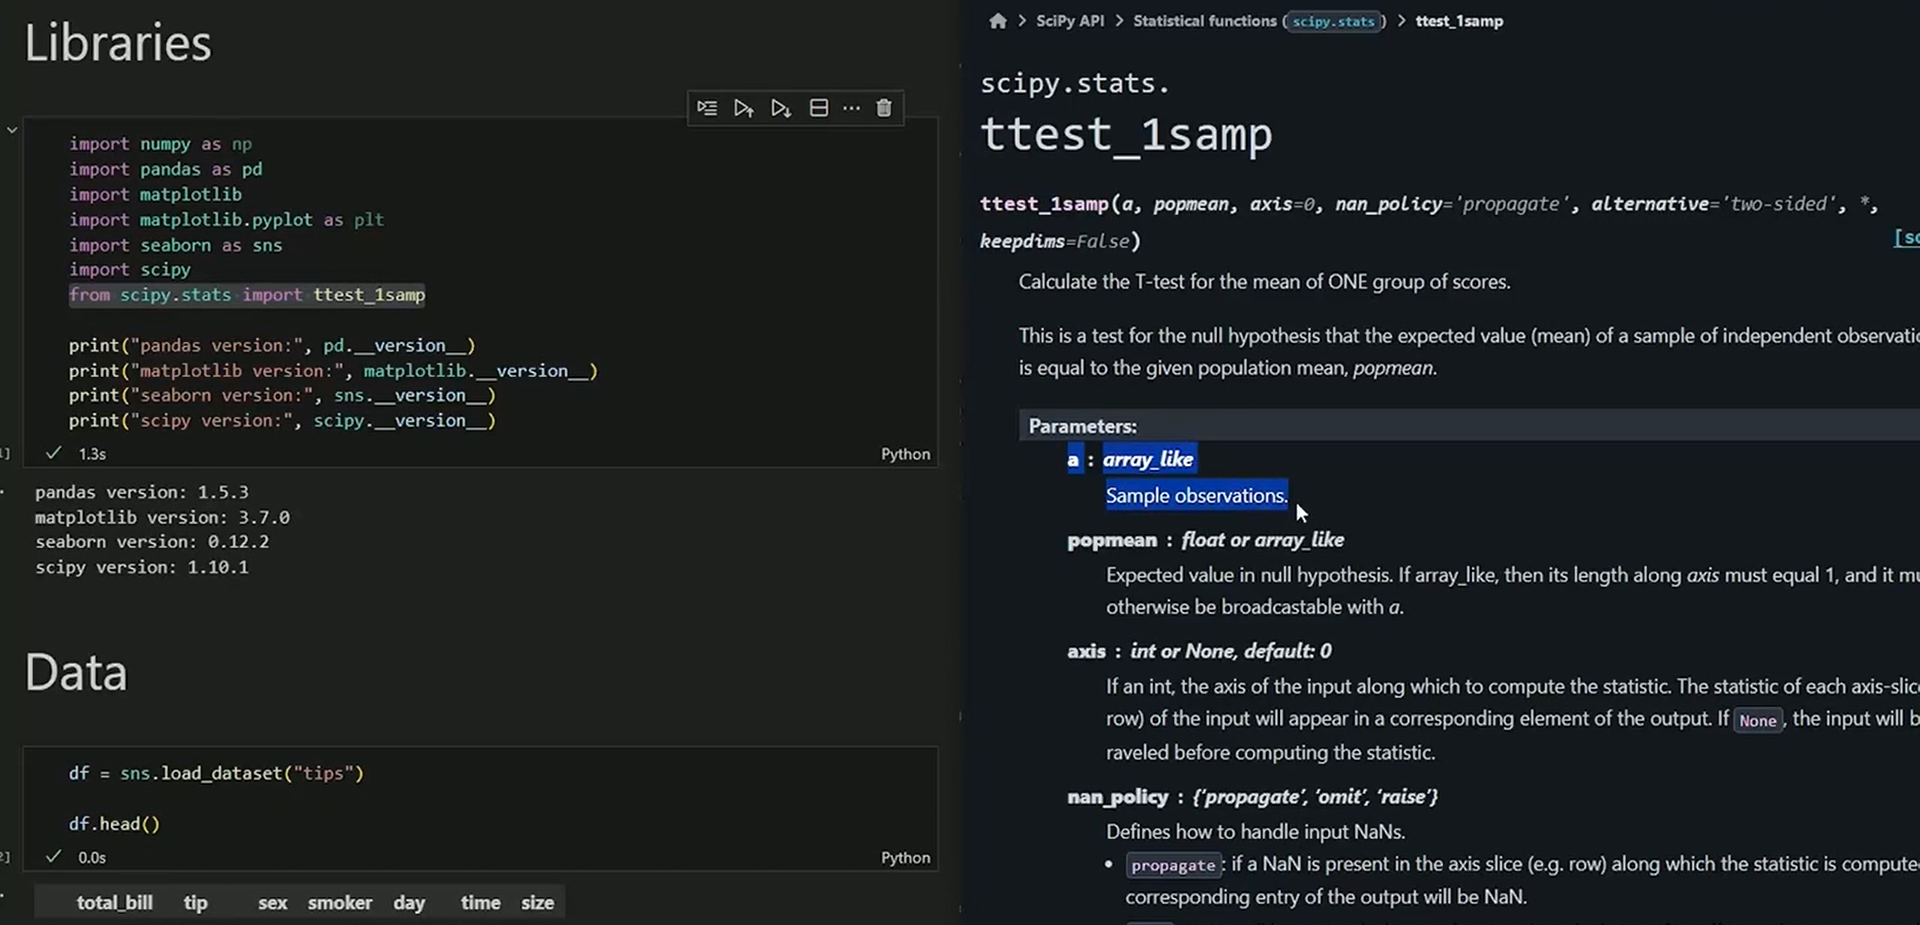

In [69]:
from scipy.stats import ttest_1samp

In [70]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [71]:
ttest_1samp(df['tip'],popmean=3.5)

TtestResult(statistic=np.float64(-5.664152292840388), pvalue=np.float64(4.1605377123077016e-08), df=np.int64(243))

In [72]:
alpha = 0.02

In [73]:
p_value = ttest_1samp(df['tip'], popmean=3.5).pvalue

if p_value < alpha:
    print("Nous avons suffisamment d'évidences, on rejette H0")
else:
    print("Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0")

Nous avons suffisamment d'évidences, on rejette H0


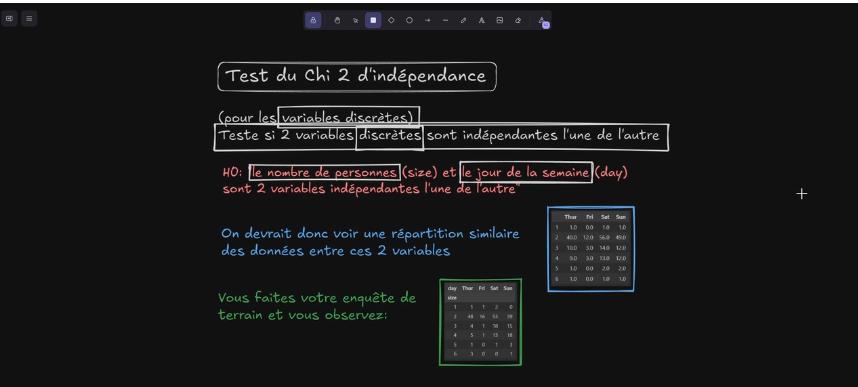

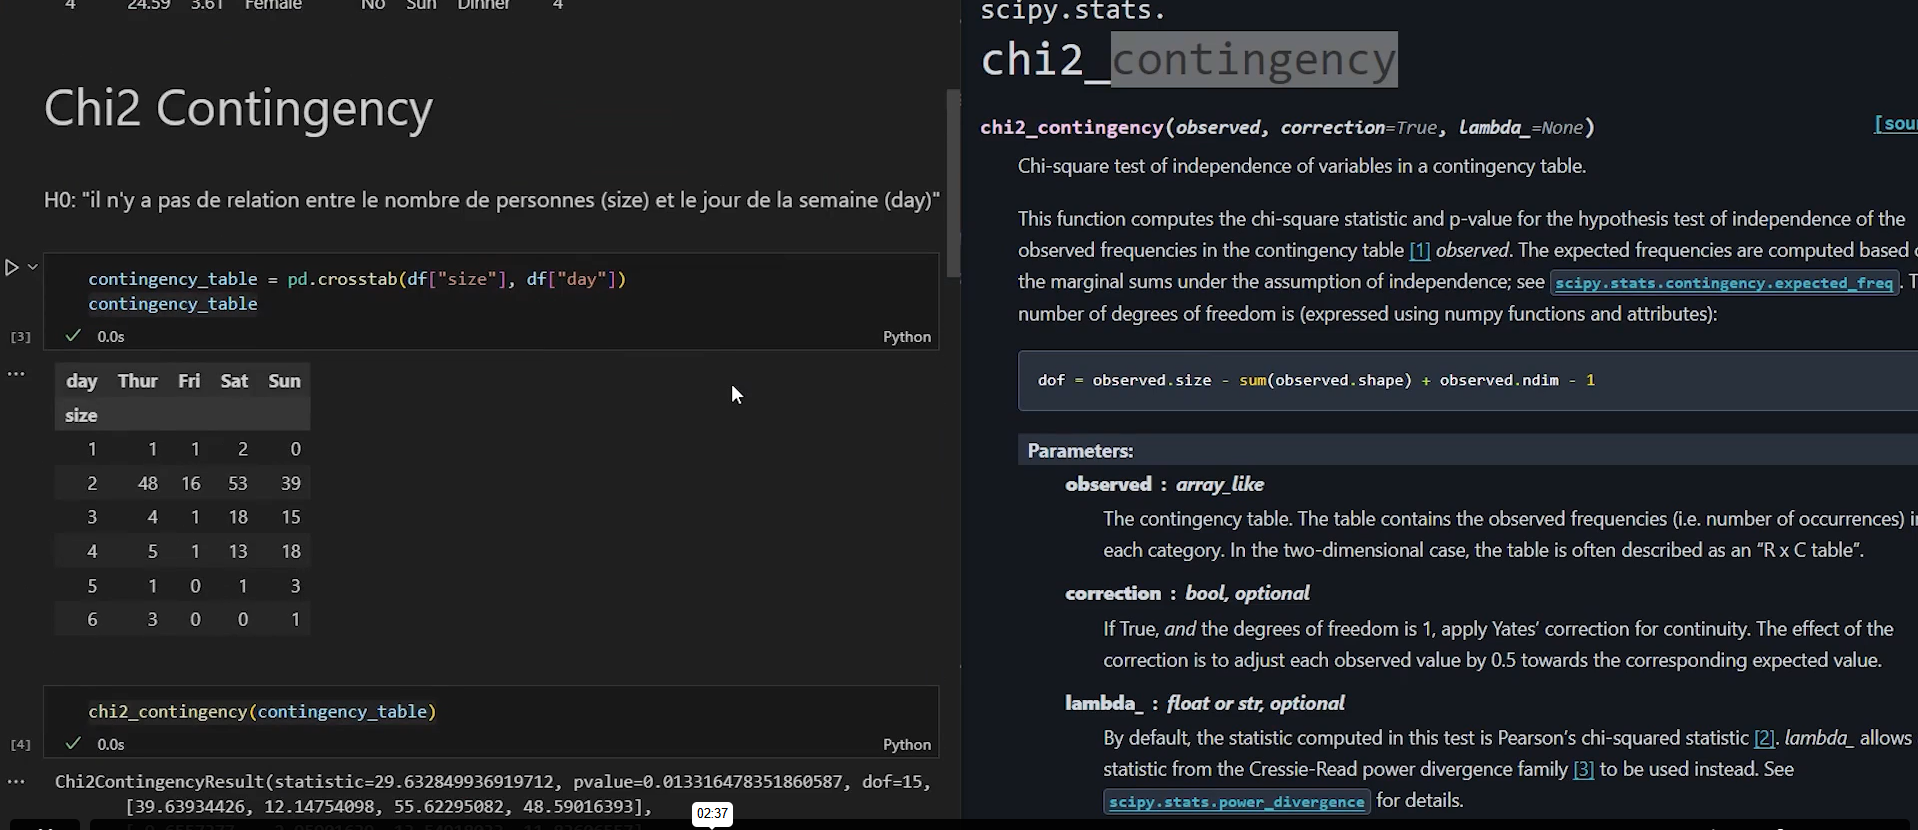

In [74]:
from scipy.stats import chi2_contingency

In [75]:
contengencie_table = pd.crosstab(df['day'],df['time'])
contengencie_table

time  Lunch  Dinner
day                
Thur     61       1
Fri       7      12
Sat       0      87
Sun       0      76

In [76]:
chi2_contingency(contengencie_table)

Chi2ContingencyResult(statistic=np.float64(217.1126728434853), pvalue=np.float64(8.449897551777147e-47), dof=3, expected_freq=array([[17.27868852, 44.72131148],
       [ 5.29508197, 13.70491803],
       [24.24590164, 62.75409836],
       [21.18032787, 54.81967213]]))

In [77]:
alpha = 0.02
p_value = chi2_contingency(contengencie_table).pvalue

if p_value < alpha:
    print("Nous avons suffisamment d'évidences, on rejette H0")
else:
    print("Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0")    

Nous avons suffisamment d'évidences, on rejette H0


# test de student
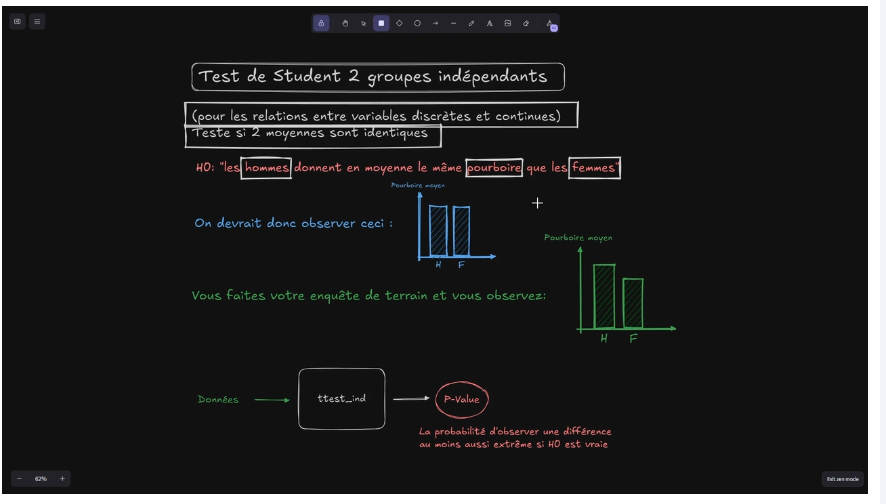

In [78]:
from scipy.stats import ttest_ind

In [79]:
df.groupby('sex')['tip'].describe()

/tmp/ipykernel_3464/1286696031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].describe()


count      mean       std  min  25%   50%   75%   max
sex                                                          
Male    157.0  3.089618  1.489102  1.0  2.0  3.00  3.76  10.0
Female   87.0  2.833448  1.159495  1.0  2.0  2.75  3.50   6.5

In [80]:
df_male=df.query("`sex`=='Male'")
df_female=df.query("`sex`=='female'")    

In [81]:
ttest_ind(df_male['tip'],df_female['tip'])

/home/romaric420/Analyse/.venv/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [82]:
alpha = 0.02
p_value = ttest_ind(df_male['tip'],df_female['tip']).pvalue

if p_value < alpha:
    print("Nous avons suffisamment d'évidences, on rejette H0")
else:
    print("Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0")

Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0


# test D'ANOVA

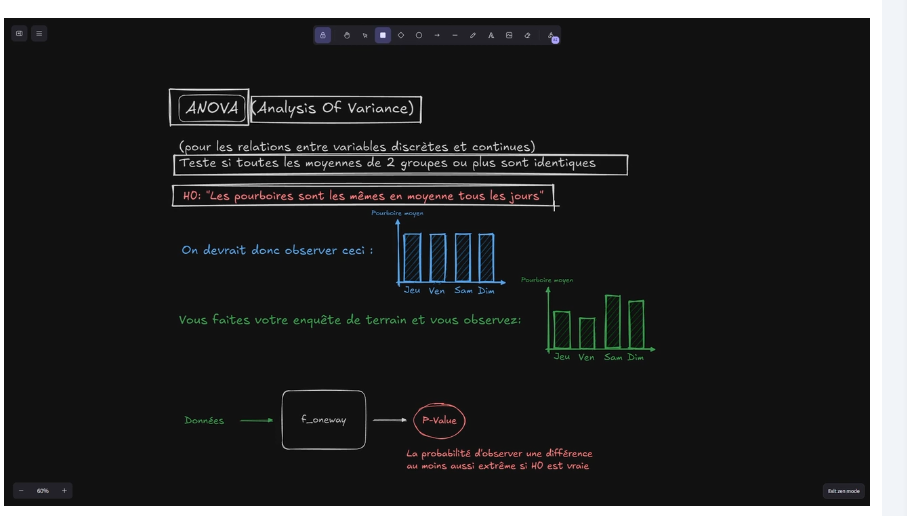

In [84]:
from scipy.stats import f_oneway

In [86]:
df.groupby('day')['tip'].mean()

/tmp/ipykernel_3464/4148581069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].mean()


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [88]:
df.groupby('day',observed=True)['tip'].apply(list)

day
Thur    [4.0, 3.0, 2.71, 3.0, 3.4, 1.83, 5.0, 2.03, 5....
Fri     [3.0, 3.5, 1.0, 4.3, 3.25, 4.73, 4.0, 1.5, 3.0...
Sat     [3.35, 4.08, 2.75, 2.23, 7.58, 3.18, 2.34, 2.0...
Sun     [1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,...
Name: tip, dtype: object

In [90]:
alpha = 0.02

p_value = f_oneway(*df.groupby('day',observed=True)['tip'].apply(list)).pvalue  

if p_value < alpha:
    print("Nous avons suffisamment d'évidences, on rejette H0")
else:
    print("Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0")  

Nous n'avons pas suffisamment d'évidences, on ne rejette pas H0


# test de pearson
pas vraiment tres utiliser sauf pour les analyses poussees
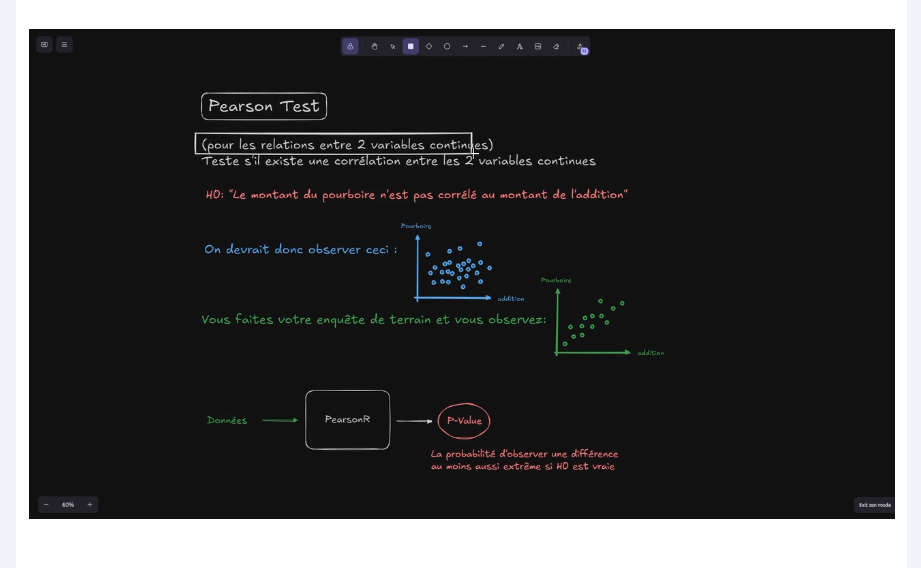

In [91]:
from scipy.stats import pearsonr